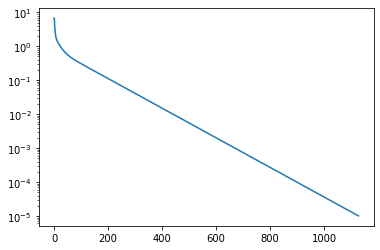

In [245]:
# Градиентный спуск с постоянным шагом

import numpy as np
import math
import random
import matplotlib.pyplot as plt

N = 10 
eps = 10**(-5)

U = np.random.sample((N, N))
Q = np.linalg.qr(U)[0]
D = np.zeros((N, N))
for i in range(N):
    D[i][i] = i + 1
A = ((Q.transpose()).dot(D)).dot(Q)
b = np.random.sample(N)
x = np.zeros(N)

M = (A.transpose()).dot(A)
d = (A.transpose()).dot(b)

h = 1/max(np.linalg.eigvals(M))

r = []
g = M.dot(x) - d
norm = np.linalg.norm(g)
while norm > eps:
    r.append(norm)
    g = M.dot(x) - d
    norm = np.linalg.norm(g)
    x = x - h*g
plt.semilogy(r)

In [246]:
x - np.linalg.solve(A, b)

array([ 1.75634603e-06, -5.44428654e-07, -2.98740159e-07, -6.11877403e-06,
       -3.81985732e-06, -1.77259336e-06, -1.09361141e-06,  3.12997096e-06,
       -1.45282968e-06, -4.99570366e-06])

In [247]:
x

array([ 0.07230441,  0.24895856,  0.04383892,  0.59846036,  0.26476528,
        0.12698387,  0.36615292, -0.05480117,  0.26105194,  0.44784351])

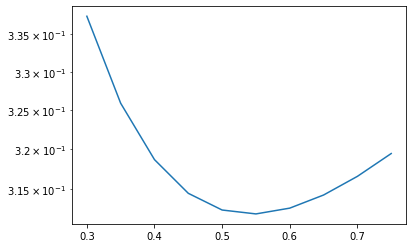

In [249]:
# Переход к композитной оптимизации + децентрализация
sol = np.linalg.solve(A, b)

def test_R(R):
    X = np.zeros(N*N)

    L = -np.ones((N, N))
    for i in range(N):
        L[i][i] += N
    W = np.kron(L, np.eye(N))

    err = []

    for i in range(1000):
        current_err = []
        for j in range(N):
            cW = W[::,N*j:N*j+N]
            aTa = np.array([[A[j][p]*A[j][q] for p in range(N)] for q in range(N)])
            eigv = [abs(i) for i in np.linalg.eigvals(aTa + R*(cW.transpose()).dot(cW))]
            h = 1/max(eigv)
            grad = aTa.dot(X[N*j:N*j+N]) + R*(cW.transpose()).dot(W.dot(X)) - b[j]*A[j]
            X[N*j:N*j+N] = X[N*j:N*j+N] - h*grad
            current_err.append(np.linalg.norm(X[N*j:N*j+N] - sol))
        err.append(max(current_err))
    return err[-1]

err1 = []
R1 = []
for i in range(10):
    R = 0.3 + 0.05*i 
    R1.append(R)
    err1.append(test_R(R))
plt.semilogy(R1, err1)

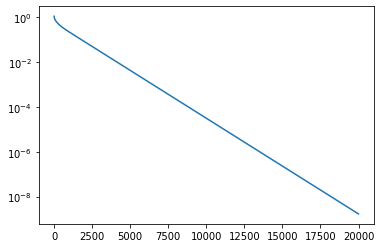

In [257]:
sol = np.linalg.solve(A, b)
R = 0.5
X = np.zeros(N*N)

L = -np.ones((N, N))
for i in range(N):
    L[i][i] += N
W = np.kron(L, np.eye(N))

err = []
err_WX = []

aTa_list = [np.array([[A[j][p]*A[j][q] for p in range(N)] for q in range(N)]) for j in range(N)]

for i in range(20000):
    current_err = []
    for j in range(N):
        cW = W[::,N*j:N*j+N]
        aTa = aTa_list[j]
        eigv = np.linalg.eigvals(aTa + R*(cW.transpose()).dot(cW))
        eigv = [abs(i) for i in eigv]
        h = 1/max(eigv)
        grad = aTa.dot(X[N*j:N*j+N]) + R*(cW.transpose()).dot(W.dot(X)) - b[j]*A[j]
        X[N*j:N*j+N] = X[N*j:N*j+N] - h*grad
        current_err.append(np.linalg.norm(X[N*j:N*j+N] - sol))
    err.append(max(current_err))
    err_WX.append(np.linalg.norm(W.dot(X)))
plt.semilogy(err_WX)

In [259]:
[err[i] - err_WX[i] for i in range(100)]

[-0.14557537588169822,
 -0.12118586277617371,
 -0.10841768062678081,
 -0.09704064964611003,
 -0.08666328075173269,
 -0.07712371326444922,
 -0.06830895380501989,
 -0.060129469234381006,
 -0.05251047621218008,
 -0.04538847591037931,
 -0.038709249688340774,
 -0.032394873480268704,
 -0.026427855618777585,
 -0.020785383925003842,
 -0.015437763840278729,
 -0.010359283020114685,
 -0.005527591827797829,
 -0.0009231823546439477,
 0.003471049501097556,
 0.007670171865877151,
 0.011687525626663864,
 0.015534983412861969,
 0.019223166755271248,
 0.02276162814109539,
 0.02615900364391699,
 0.029423140917753332,
 0.032561206585721814,
 0.035579776409353725,
 0.038484911078638606,
 0.04128222000163917,
 0.04397691508369128,
 0.04657385615907994,
 0.0490775894633273,
 0.05149238030381109,
 0.05382224089344434,
 0.05607095415071872,
 0.058242094134511535,
 0.06033904366944398,
 0.062365009623679524,
 0.06432303622277946,
 0.06621601671810462,
 0.06804670367404175,
 0.06981771809330173,
 0.0715315575621